In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
import statsmodels.api as sm
import pandas as pd

plt.style.use('ggplot')

In order to follow this notes with least pain, it is strongly advised to study in <a href='https://github.com/MacroAnalyst/Linear_Algebra_With_Python'>linear algebra</a>, <a href='https://github.com/MacroAnalyst/Basic_Statistics_With_Python'>statistics</a>, <a href='https://github.com/MacroAnalyst/Probability_Theory'>probability theory</a> and <a href='https://github.com/MacroAnalyst/Basic_Econometrics_With_Python'>basic econometrics</a>.

Click the hyperlink, you will find all course notes in my GitHub pages.

Advanced econometrics aims to provide thorough mathematical foundation to econometric theory, which will be extremely useful in handling complicated data science projects. 

# <font face="gotham" color="purple"> The Geometry of Vector Space </font>

Our starting point of **Ordinary Least Square** is to understand that linear regression model usually takes the matrix form

$$
\boldsymbol{y} = \boldsymbol{X\beta}+\boldsymbol{u}\tag{1}\label{1}
$$

where $\boldsymbol{y}$ and $\boldsymbol{u}$ are $n\times 1$ matrices, $\boldsymbol{X}$ is a $n \times k$ matrix and $\boldsymbol{\beta}$ is a $k \times 1$ matrix.
$$
\boldsymbol{y}=\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array}\right], \quad \boldsymbol{u}=\left[\begin{array}{c}
u_{1} \\
u_{2} \\
\vdots \\
u_{n}
\end{array}\right], \quad \boldsymbol{X}_{n\times k}=\left[\begin{array}{cccc}
1 & X_{11} & X_{12} & \ldots & X_{1k}  \\
1 & X_{21} & X_{22} & \ldots & X_{1k}\\
\vdots & \vdots & \vdots& \ddots& \vdots\\
1 & X_{n1} & X_{n2} & \ldots& X_{nk}
\end{array}\right], \quad \text { and } \quad \boldsymbol{\beta}=\left[\begin{array}{c}
\beta_{1} \\
\beta_{2} \\
\vdots\\
\beta_k
\end{array}\right]
$$

## <font face="gotham" color="purple"> Two Inequalities </font>

There are two inequalities useful for further illustration in vector space. Define $\boldsymbol{x}$ and $\boldsymbol{y}$ as vectors in $\mathbb{R}^n$.

### <font face="gotham" color="purple">The Cauchy-Schwarz Inequality</font>

$$
|\boldsymbol{x}^T\boldsymbol{y}| \leq \|\boldsymbol{x}\|\|\boldsymbol{y}\| \tag{2}\label{2}
$$
$\|\|$ notation means the **modulus** or length of vector.

The Cauchy-Schwarz inequality holds because of another famous formula dervied from law of cosine, recall that $-1 \leq \cos{\vartheta} \leq 1$

\begin{equation}
\boldsymbol{x}^T\boldsymbol{y} = \|\boldsymbol{x}\|\|\boldsymbol{y}\| \cos{\vartheta} \label{3}\tag{3}
\end{equation}

The most important implication is that when $\vartheta = 90^{\circ}$, i.e. $\boldsymbol{x}\perp\boldsymbol{y}$, then $\boldsymbol{x}^T\boldsymbol{y} = 0$.

### <font face="gotham" color="purple">The Triangle Inequality </font>

This is the vector version of a primary school concept: the length of the third edge is at least as long as the sum of other two edges.

$$
\|\boldsymbol{x}+\boldsymbol{y}\| \leq \|\boldsymbol{x}\| +  \|\boldsymbol{y}\|
$$

## <font face="gotham" color="purple">Basis of Subspace  </font>

A set of vectors $\boldsymbol{X}_{n\times k} = (\boldsymbol{x}_1, ..., \boldsymbol{x}_k)$ which spans a subspace $W$ is denoted as 

$$
W = \text{Span}\left(\boldsymbol{x}_{1}, \ldots, \boldsymbol{x}_{k}\right) \equiv\left\{\boldsymbol{z} \in \mathbb{R}^{n} \bigg| \boldsymbol{z}=\sum_{i=1}^{k} b_{i} \boldsymbol{x}_{i}, \quad b_{i} \in \mathbb{R}\right\}
$$

The orthogonal complement of $W$, is denoted as

$$
W^{\perp} = \text{Span}^\perp(\boldsymbol{x}_{1}, \ldots, \boldsymbol{x}_{k}) = \left\{\boldsymbol{w} \in \mathbb{R}^{n} | \boldsymbol{w}^{\top} \boldsymbol{z}=0 \text { for all } \boldsymbol{z} \in \text{Span}(\boldsymbol{X})\right\}
$$

The $\text{dim}W = k$ and $\text{dim}W^\perp = n-k$. 

# <font face="gotham" color="purple"> The Geometry of OLS Estimation</font>

Take a look at the graph below, which is the geometric concept of OLS. The vectors are arbitrarily chosen only serving purpose of visualization in the codes, though demonstration is 3D, you shall imagine them exist in higher dimension, i.e. in $\mathbb{R}^n$ rather than $\mathbb{R}^3$.

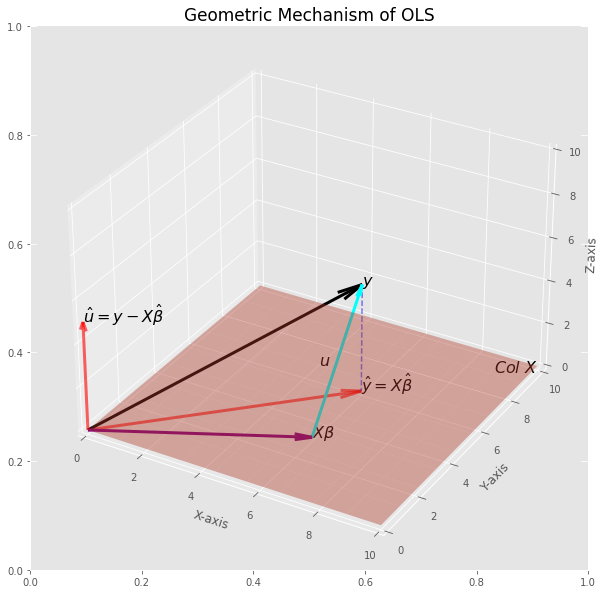

In [29]:
s = np.linspace(0, 10, 10)
t = np.linspace(0, 10, 10)
S, T = np.meshgrid(s, t)
X = S
Y = T
Z = np.zeros((10, 10))

fig, ax = plt.subplots(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha = .4)

y = np.array([6, 6, 5])
y_vec = np.array([[0, 0, 0, y[0], y[1], y[2]]])
X, Y, Z, U, V, W = zip(*y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


yhat = np.array([y[0], y[1], 0])
yhat_vec = np.array([[0, 0, 0, yhat[0], yhat[1], yhat[2]]])
X, Y, Z, U, V, W = zip(*yhat_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

yhat_vec = np.array([[0, 0, 0, 0, 0, y[2]]])
X, Y, Z, U, V, W = zip(*yhat_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

Xbeta = np.array([6, 3, 0])
y_vec = np.array([[0, 0, 0, Xbeta[0], Xbeta[1], Xbeta[2]]])
X, Y, Z, U, V, W = zip(*y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

u = y - Xbeta
u_vec = np.array([[Xbeta[0], Xbeta[1], Xbeta[2], u[0], u[1], u[2]]])
X, Y, Z, U, V, W = zip(*u_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'Aqua', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

point1 = [y[0], y[1], y[2]]
point2 = [yhat[0], yhat[1], yhat[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.5, ls = '--')


ax.text(x = y[0], y = y[1], z = y[2], s = '$y$', size = 16)
ax.text(9, 9, 0, '$Col\ X$', size = 16)
ax.text(x = y[0], y = y[1], z = 0, s = r'$\hat{y}=X\hat{\beta}$', size = 16)
ax.text(x = 0, y = 0, z = y[2], s = r'$\hat{u} = y-X\hat{\beta}$', size = 16)
ax.text(x = Xbeta[0], y = Xbeta[1], z = Xbeta[2], s = r'$X\beta$', size = 16)
ax.text(x = 5.6, y = 4.1, z = 2.4, s = r'$u$', size = 16)

for i in ['x', 'y', 'z']:
    exec('ax.set_'+i+'lim3d(0, 10)')
    
ax.set_title('Geometric Mechanism of OLS', fontsize = 17)
ax.set_xlabel('X-axis'),ax.set_ylabel('Y-axis'),ax.set_zlabel('Z-axis')
plt.show()

In words, OLS algorithm is to find a special linear combination with basis of $\text{Col}\boldsymbol{X}$ or $\text{Span}\boldsymbol{X}$.

And this linear combination is the orthogonal projection $\boldsymbol{\hat{y}}$ of $\boldsymbol{y}$ onto $\text{Span}\boldsymbol{X}$, which means the distance $\|\boldsymbol{y}-\boldsymbol{\hat{y}}\|$ is the shortest among all other possible $\|\boldsymbol{y}-\text{proj}_{\text{Col}X}\boldsymbol{y}\|$, where $\text{proj}_{\text{Col}X}\boldsymbol{y}$ means a projection of $\boldsymbol{y}$ onto column space of $\boldsymbol{X}$ i.e. $\text{Col}\boldsymbol{X}$, which is depicted as a transparent plane. 

And also note that orthogonal complement $\boldsymbol{\hat{u}}$ most possibly will smaller than $\boldsymbol{u}$ itself, which is decided by the nature of OLS algorithm. In the graph, we give $\boldsymbol{\hat{u}}$ red color and aqua color to $\boldsymbol{u}$.

To formulate mathematically the verbal description above, 

$$
\boldsymbol{X}^T(\boldsymbol{y-X\hat{\beta}})=\boldsymbol{X}^T\boldsymbol{\hat{u}}= \boldsymbol{0}\label{4}\tag{4}
$$

which is called **orthogonality condition of OLS**.

With orthogonality condition, we achieve the most famous OLS algorithm of $\hat{\boldsymbol{\beta}}$

$$
\boldsymbol{\hat{\beta}} = (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}\label{5}\tag{5}
$$

## <font face="gotham" color="purple"> Test Trials of OLS Algorithm </font>

Construct $\boldsymbol{X}$ matrix

In [30]:
const = np.ones(100)
const = const[np.newaxis, :]

X_inde = np.random.randn(3, 100)

X = np.concatenate((const.T, X_inde.T), axis=1)

Set true $\boldsymbol{\beta} = [2, 3, 4, 5]^T$

In [31]:
beta_array = np.array([2, 3, 4, 5])
beta_array = beta_array[np.newaxis, :].T

Generate disturbance term $\boldsymbol{u}$ with a standard normal distribution

In [32]:
u = np.random.randn(100)
u = u[np.newaxis, :].T

Generate $\boldsymbol{y}$

In [33]:
y = X@beta_array + u

Estimate parameters with OLS algorithm

In [34]:
beta_hat = np.linalg.inv(X.T@X)@X.T@y
for i in range(len(beta_array)):
    print('beta' + str(i) + ':' + str(beta_hat[i]))

beta0:[2.03342725]
beta1:[2.98315916]
beta2:[4.07795823]
beta3:[5.03053271]


Verify the results with ```statsmodels```

In [35]:
ols_obj = sm.OLS(y, X)

In [36]:
ols_obj_fit = ols_obj.fit()
beta_array_sm = ols_obj.fit().params
for i in range(len(beta_array_sm)):
    print('beta' + str(i) + ':' + str(beta_array_sm[i]))

beta0:2.0334272497206833
beta1:2.9831591649885
beta2:4.077958227399275
beta3:5.030532707036045


## <font face="gotham" color="purple"> Monte Carlo Simulation of OLS Algorithm </font>

In [37]:
beta_hat = []
for i in range(3000):
    u = np.random.randn(100)
    u = u[np.newaxis, :].T
    y = X@beta_array + u
    beta_hat.append(np.linalg.inv(X.T@X)@X.T@y)
beta_hat = np.array(beta_hat).T

Compare with true parameters
$$
\boldsymbol{\beta} = [2, 3, 4, 5]^T
$$

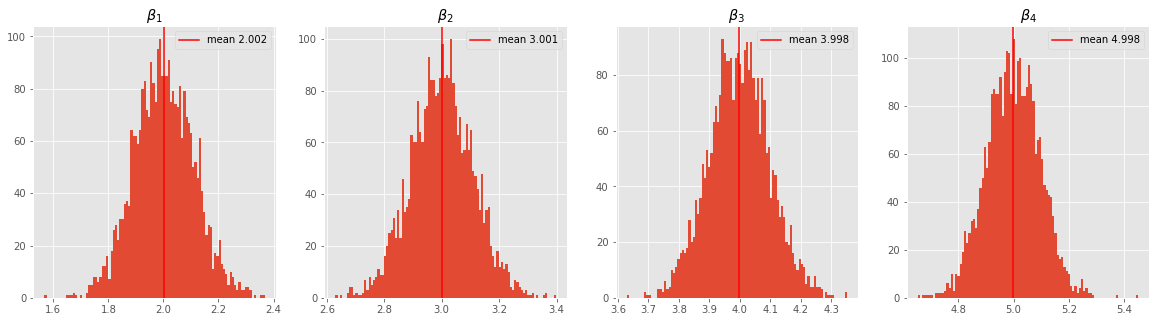

In [38]:
fig, ax = plt.subplots(figsize=(20, 5), nrows=1, ncols=4)
for i in range(len(beta_hat[0])):
    ax[i].hist(beta_hat[0][i], bins=100)
    ax[i].axvline(x=np.mean(beta_hat[0][i]), color='red', label ='mean {}'.format(np.round(np.mean(beta_hat[0][i]),3)))
    ax[i].set_title(r'$\beta_{}$'.format(i+1))
    ax[i].legend()
plt.show()

## <font face="gotham" color="purple"> Goodness of Fit in Pythagorean Theorem</font>

One important implication from orthogonality condition is that $\sum_{t=1}^n\hat{u}_t=0$. 

To see why this holds, we denote the first column of $\boldsymbol{X}$ as $\iota$ (iota), which contains all $1$'s, this vector is surly in the $\text{Col}\boldsymbol X$, thus

$$
\iota^T \boldsymbol{\hat{u}} = \sum_{t=1}^n\hat{u}_t=0
$$

Using the residual of last round generated data, numerical value essentially equals $0$

In [39]:
np.sum(ols_obj_fit.resid)

-2.6201263381153694e-14

The fitted value $\boldsymbol{y}=\boldsymbol{X\hat{\beta}}$ is the linear combination that we are seeking for, and it is orthogonal to OLS residuals $ \boldsymbol{\hat{u}}$ 

$$(\boldsymbol{X} \boldsymbol{\hat{\beta}})^{T} \boldsymbol{\hat{u}}= \boldsymbol{\hat{\beta}}^{T} \boldsymbol{X}^{T} \boldsymbol{\hat{u}}=\mathbf{0}$$

$ \boldsymbol{\hat{u}}$ can be seen as a function of $ \boldsymbol{\beta}$, denoted $\boldsymbol{\hat{u}(\beta)}$, and $\boldsymbol{\hat{\beta}}$ minimizes $\|\boldsymbol{\hat{u}(\beta)}\|$. 

Since we have known that $\boldsymbol{\hat{u}}\perp \text{Col}X$, then the length of three vectors can be represented by Pythagoras' Theorem.

$$
\|\boldsymbol{y}\|^2= \|\boldsymbol{X\hat{\beta}}\|^2+\|\boldsymbol{\hat{u}}\|^2\tag{5}
$$

This is geometric version of the classical property of OLS

$$
TSS = ESS + RSS
$$

Numerical version is
\begin{equation}
\underbrace{\sum_{i=1}^n(y_i-\bar{y})^2}_{TSS}=\underbrace{\sum_{i=1}^n(\hat{y}_i-\bar{y})^2}_{ESS}+\underbrace{\sum_{i=1}^n\hat{u}^2_i}_{RSS}
\end{equation}

In [40]:
const = np.ones(100)
const = const[np.newaxis, :]
X_inde = np.random.randn(3, 100)
X = np.concatenate((const.T, X_inde.T), axis=1)

beta_array = np.array([2, 3, 4, 5])
beta_array = beta_array[np.newaxis, :].T

beta_hat = np.linalg.inv(X.T@X)@X.T@y

In [42]:
TSS = np.linalg.norm(y)
ESS = np.linalg.norm(X@beta_hat)
RSS = np.linalg.norm(y-X@beta_hat)
print('TSS : {:.4f}'.format(TSS**2))
print('ESS : {:.4f}'.format(ESS**2))
print('RSS : {:.4f}'.format(RSS**2))
print('ESS + RSS : {:.4f}'.format(ESS**2+RSS**2))

TSS : 5388.7266
ESS : 1062.9310
RSS : 4325.7956
ESS + RSS : 5388.7266


Compare with ```statsmodel``` results, we can notice the $\text{ESS}$ is different, because it is computed by subtracting $\text{RSS}$ from centered $\text{TSS}$. The difference between centered or uncentered values actually have little practical significance, i.e. in practice we report one of them and stick to it with further explanation. But we will explain later in this chapter.

In [43]:
ols_obj_fit = sm.OLS(y, X).fit()

print('Uncentered TSS from Statsmodels : {:.4f}'.format(ols_obj_fit.uncentered_tss))
print('ESS from Statsmodels : {:.4f}'.format(ols_obj_fit.ess))
print('RSS from Statsmodels : {:.4f}'.format(ols_obj_fit.ssr))
print('ESS + RSS, from Statsmodels : {:.4f}'.format(ols_obj_fit.ess+ols_obj_fit.ssr))

Uncentered TSS from Statsmodels : 5388.7266
ESS from Statsmodels : 187.3283
RSS from Statsmodels : 4325.7956
ESS + RSS, from Statsmodels : 4513.1239


## <font face="gotham" color="purple"> Projection Matrix </font>

We have known that $\boldsymbol{X\hat{\beta}}$ is the orthogonal projection of $\boldsymbol{y}$ , here we substitute OLS solution back into it

$$
\boldsymbol{X\hat{\beta}}=\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}= \boldsymbol{P}_{\boldsymbol{X}}\boldsymbol{y}
$$

where $ \boldsymbol{P}_{\boldsymbol{X}}=\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T$ is a projection matrix which projects $\boldsymbol{y}$ onto $\text{Col}\boldsymbol{X}$.

If you are familiar with linear algebra, you would have seen formula of orthogonal projection, below is a vector presentation of $\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$


$$\hat{\mathbf{y}}=\frac{\mathbf{y} \cdot \mathbf{x}_{1}}{\mathbf{x}_{1} \cdot \mathbf{x}_{1}} \mathbf{x}_{1}+\cdots+\frac{\mathbf{y} \cdot \mathbf{x}_{k}}{\mathbf{x}_{k} \cdot \mathbf{x}_{x}} \mathbf{x}_k
=\frac{\mathbf{x}_1^T \mathbf{y}}{\mathbf{x}_{1}^T  \mathbf{x}_{1}} \mathbf{x}_{1}+\cdots+\frac{\mathbf{x}_k^T \mathbf{y}}{\mathbf{x}_{k}^T  \mathbf{x}_{k}} \mathbf{x}_{k}
$$

Another projection matrix $\boldsymbol{M}_{\boldsymbol{X}}=\left(\mathbf{I}-\boldsymbol{X}\left(\boldsymbol{X}^{T} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{T}\right)= \mathbf{I} - \boldsymbol{P}_{\boldsymbol{X}}$ is constructed from

$$
\boldsymbol{\hat{u}}=\boldsymbol{y}-\boldsymbol{X} \boldsymbol{\hat{\beta}} =\boldsymbol{y}-\boldsymbol{P}_{\boldsymbol{X}} \boldsymbol{y}=\left(\mathbf{I}-\boldsymbol{X}\left(\boldsymbol{X}^{T} \boldsymbol{X}\right)^{-1} \boldsymbol{X}^{T}\right) \boldsymbol{y}=\boldsymbol{M}_{\boldsymbol{X}} \boldsymbol{y}
$$

$\boldsymbol{M}_X$ can project any vector into the subspace of $\perp \boldsymbol{X}$.

In [44]:
def proj_mat_P(X):
##computing projection matrix P. Input X represents regressors.##
    proj_matP = X@np.linalg.inv(X.T@X)@X.T
    return proj_matP

def proj_mat_M(X):
##computing projection matrix M. Input X represents regressors.##
    proj_matM =  np.eye(X.shape[0]) - X@np.linalg.inv(X.T@X)@X.T
    return proj_matM

Let's verify if our projection matrix $\boldsymbol{P}_{\boldsymbol{X}}\boldsymbol{y}$ yields the same result as $\boldsymbol{\hat{y}}$ from ```statsmodels```, calculate the difference then print the first $10$ entries.

In [45]:
fitted_discrp = proj_mat_P(X)@y - ols_obj_fit.fittedvalues[np.newaxis,:].T
fitted_discrp[:10]

array([[ 1.64313008e-14],
       [-3.55271368e-15],
       [ 7.10542736e-15],
       [ 6.21724894e-15],
       [ 1.28785871e-14],
       [ 7.10542736e-15],
       [-1.33226763e-15],
       [ 5.32907052e-15],
       [ 1.19904087e-14],
       [ 8.43769499e-15]])

Similarly, verify if $\boldsymbol{M}_{\boldsymbol{X}}\boldsymbol{y} = \boldsymbol{\hat{u}}$, also print the first $10$ entries

In [46]:
resid_discrp = proj_mat_M(X)@y - ols_obj_fit.resid[np.newaxis,:].T
resid_discrp[:10]

array([[-1.64313008e-14],
       [ 4.44089210e-15],
       [-6.88338275e-15],
       [-6.21724894e-15],
       [-1.24344979e-14],
       [-7.10542736e-15],
       [ 0.00000000e+00],
       [-2.66453526e-15],
       [-1.24344979e-14],
       [-8.88178420e-15]])

### <font face="gotham" color="purple"> Properties of Projection Matrix </font>

Geometrically, it is easy to visualize properties of projection matrices in your mind
$$
\boldsymbol{P}_{\boldsymbol{X}}\boldsymbol{P}_{\boldsymbol{X}}=\boldsymbol{P}_{\boldsymbol{X}}\quad \text{and}\quad \boldsymbol{M}_{\boldsymbol{X}}\boldsymbol{M}_{\boldsymbol{X}}=\boldsymbol{M}_{\boldsymbol{X}}
$$
which are called **idempotent**.

We can verify numerically, if multiplication equal zero matrix
$$
\boldsymbol{P}_{\boldsymbol{X}}\boldsymbol{P}_{\boldsymbol{X}}-\boldsymbol{P}_{\boldsymbol{X}} = \boldsymbol{O}\\
\boldsymbol{M}_{\boldsymbol{X}}\boldsymbol{M}_{\boldsymbol{X}}-\boldsymbol{M}_{\boldsymbol{X}} = \boldsymbol{O}
$$

In [47]:
Proj_P_X = proj_mat_P(X)
Proj_P_X@Proj_P_X - Proj_P_X

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.46944695e-18,  0.00000000e+00, -3.46944695e-18],
       [-3.46944695e-18,  0.00000000e+00, -3.46944695e-18, ...,
         2.16840434e-19,  4.33680869e-19, -8.67361738e-19],
       [ 1.73472348e-18, -3.46944695e-18, -3.46944695e-18, ...,
         1.30104261e-18,  1.73472348e-18, -6.93889390e-18],
       ...,
       [ 1.73472348e-18, -8.67361738e-19,  8.67361738e-19, ...,
         3.46944695e-18, -3.46944695e-18,  1.82959117e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.93889390e-18,  0.00000000e+00,  4.22838847e-18],
       [-3.46944695e-18, -2.60208521e-18, -5.20417043e-18, ...,
         3.67273486e-18,  3.90312782e-18, -3.46944695e-18]])

In [48]:
Proj_M_X = proj_mat_M(X)
Proj_M_X@Proj_M_X - Proj_M_X

array([[ 0.00000000e+00,  3.46944695e-18, -1.56125113e-17, ...,
         5.20417043e-18,  0.00000000e+00,  3.46944695e-18],
       [-3.46944695e-18,  0.00000000e+00, -1.04083409e-17, ...,
         6.50521303e-19,  1.30104261e-18,  0.00000000e+00],
       [-1.56125113e-17, -1.73472348e-17, -1.11022302e-16, ...,
         1.73472348e-18,  3.03576608e-18, -3.46944695e-18],
       ...,
       [ 3.46944695e-18, -1.30104261e-18,  1.73472348e-18, ...,
         0.00000000e+00, -3.46944695e-18,  1.82959117e-18],
       [ 0.00000000e+00,  8.67361738e-19,  8.67361738e-19, ...,
        -6.93889390e-18,  0.00000000e+00,  4.33680869e-18],
       [ 6.93889390e-18,  0.00000000e+00, -5.20417043e-18, ...,
         3.67273486e-18,  4.01154804e-18,  0.00000000e+00]])

$\boldsymbol{P}_{\boldsymbol{X}}$ and $\boldsymbol{M}_{\boldsymbol{X}}$ are _symmetric matrices_, can be easily shown with rules of transpose.

$$
\boldsymbol{P}_{\boldsymbol{X}}^T = \boldsymbol{X}\left[(\boldsymbol{X}^T\boldsymbol{X})^{-1}\right]^{T}\boldsymbol{X}^T = \boldsymbol{X}\left[(\boldsymbol{X}^T\boldsymbol{X})^{T}\right]^{-1}\boldsymbol{X}^T =\boldsymbol{X}(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T=\boldsymbol{P}_{\boldsymbol{X}}
$$

$$
\boldsymbol{M}_{\boldsymbol{X}}^T = (\mathbf{I} - \boldsymbol{P}_{\boldsymbol{X}})^T = \mathbf{I} - \boldsymbol{P}_{\boldsymbol{X}}^T =  \mathbf{I} - \boldsymbol{P}_{\boldsymbol{X}} = \boldsymbol{M}_{\boldsymbol{X}}
$$

$\boldsymbol{P}_{\boldsymbol{X}}$ and $\boldsymbol{M}_{\boldsymbol{X}}$ are called **complementary projections**, because

$$
\boldsymbol{P}_{\boldsymbol{X}}+\boldsymbol{M}_{\boldsymbol{X}} = \mathbf{I}
$$

$\boldsymbol{P}_{\boldsymbol{X}}$ and $\boldsymbol{M}_{\boldsymbol{X}}$ **annihilate each other**,

$$
\boldsymbol{P}_{\boldsymbol{X}}\boldsymbol{M}_{\boldsymbol{X}} = \mathbf{O}
$$

In [49]:
Proj_P_X + Proj_M_X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [50]:
Proj_P_X@Proj_M_X

array([[ 2.23345648e-17, -1.40946282e-18,  4.63496429e-18, ...,
        -2.70425856e-18,  6.06475590e-19,  3.46944695e-18],
       [ 3.11708125e-19, -7.81980817e-18, -1.62630326e-19, ...,
        -3.58877272e-19, -5.00596472e-19,  8.67361738e-19],
       [ 3.60497222e-18, -4.06575815e-18, -8.32125167e-18, ...,
        -1.93621144e-18, -1.71439469e-18,  6.93889390e-18],
       ...,
       [-1.75558166e-18,  1.41650379e-18, -1.82101496e-18, ...,
        -1.88007441e-18,  3.69510844e-18, -1.82959117e-18],
       [ 4.18434276e-19, -5.66665042e-19, -9.60535362e-19, ...,
         7.70655722e-18, -9.50688604e-19, -4.22838847e-18],
       [-7.48099499e-18, -4.06575815e-19,  3.79470760e-18, ...,
        -3.67061728e-18, -3.93700914e-18,  6.93889390e-18]])

An  _orthogonal decomposition_ of $\boldsymbol{y}$ by Pythagoras' Theorem

$$
\|\boldsymbol{y}\|^2 = \|\boldsymbol{P}_{\boldsymbol{X}}\boldsymbol{y}\|^2+\| \boldsymbol{M}_{\boldsymbol{X}}\boldsymbol{y}\|^2
$$

However, the projection matrix is not an efficient algorithm. In computation-wise, you shall either use OLS formula or QR decomposition.

The residuals and fitted values are invariant to linear transformation of regressors (explanatory variables), which is exact reason that OLS algorithm holds even we have performed data handling, such as changing unit, in terms of projection matrix, $\boldsymbol{XA}$ is the linear combination of $\boldsymbol{X}$

$$
\boldsymbol{P}_{\boldsymbol{XA}} = \boldsymbol{XA}(\boldsymbol{A}^T\boldsymbol{X}\boldsymbol{XA})^{-1}\boldsymbol{A}^T\boldsymbol{X}^T= \boldsymbol{X}\boldsymbol{A}\boldsymbol{A}^{-1}(\boldsymbol{X}^T\boldsymbol{X})^{-1}(\boldsymbol{A}^T)^{-1}\boldsymbol{A}^T\boldsymbol{X}^T = \boldsymbol{P}_{\boldsymbol{X}}
$$

Because $\boldsymbol{XA}$ is still in $\text{Col}\boldsymbol{X}$.

# <font face="gotham" color="purple"> The Frisch-Waugh-Lovell Theorem </font>

Now consider a single linear model

$$
\boldsymbol{y}= \beta_1\boldsymbol{\iota}+\beta_2\boldsymbol{x}+\boldsymbol{u}\label{6}\tag{6}
$$

And mostly, that $\boldsymbol{x}$ and $\boldsymbol{\iota}$ are not completely independent. Geometrically speaking, they might not be orthogonal to each other.

However, we can use one-step Gram-Schmidt process to orthogonalize them. If we choose to find the orthogonal complement of $\text{proj}_{\iota}\boldsymbol{x}$, we can formulate a vector subtraction (if you don't know what's happening here, check my notebook of linear algebra.)

$$
\boldsymbol{z} = \boldsymbol{x}- \frac{\boldsymbol{x}\cdot\boldsymbol{\iota}}{\boldsymbol{\iota}\cdot\boldsymbol{\iota}}\boldsymbol{\iota} = \boldsymbol{x}-\frac{n\bar{x}}{n}\boldsymbol{\iota}=\boldsymbol{x}- \bar{x}\boldsymbol{\iota}
$$

Now we get $\boldsymbol{z}\perp \boldsymbol{\iota}$, in econometric term it is called **centering** the variable by subtracting the mean of itself. Substituting $\boldsymbol{x}= \boldsymbol{z}+\bar{x}\boldsymbol{\iota}$ back in 

$$
\boldsymbol{y}=\beta_1\boldsymbol{\iota}+\beta_2(\boldsymbol{z}+\bar{x}\boldsymbol{\iota})+u = (\beta_1+\bar{x}\beta_2)\boldsymbol{\iota}+\beta_2\boldsymbol{z}+u = \alpha_1\boldsymbol{\iota}+\alpha_2\boldsymbol{z}+\boldsymbol{u}
$$

Now the we are sure that $\boldsymbol{\iota}^T \boldsymbol{z} =0$, because of orthogonality, however note that coeffcients are no longer $\beta$'s any more.

It might not be clear at this moment why we want this property, read on.

## <font face="gotham" color="purple"> Multivariate Regression Model Visualization </font>

For multivariate regression model, we can partition $\boldsymbol{X}$ in to $[\boldsymbol{X}_1, \boldsymbol{X}_2]$, where $\boldsymbol{X}_1$ is $n \times k_1$ and $\boldsymbol{X}_2$ is $n \times k_2$, $k_1+k_2 =k$.

It is impossible to visualize any multivariate regression model which is in higher dimension, but we can visualize by imagining the subspace spanned by $\boldsymbol{X}_1$ or $\boldsymbol{X}_2$ each represented by a line. 

The regression model becomes

$$
\boldsymbol{y}=  \boldsymbol{X}_1\beta_1 + \boldsymbol{X}_2\beta_2 +\boldsymbol{u}\label{7}\tag{7}
$$

We denote $\boldsymbol{M}_1 = \boldsymbol{M}_{\boldsymbol{X}_1}=\mathbf{I}-\boldsymbol{P}_1$ where $\boldsymbol{P}_1 = \boldsymbol{P}_{\boldsymbol{X}_1} = \boldsymbol{X}_1(\boldsymbol{X}_1^T\boldsymbol{X}_1)^{-1}\boldsymbol{X}_1^T$.

$\boldsymbol{X}_1$ and $\boldsymbol{X}_2$ are not orthogonal, we can project $\boldsymbol{X}_2$ off $\boldsymbol{X}_1$ to obtain $\boldsymbol{Z} = \boldsymbol{M}_1\boldsymbol{X}_1$, where $\boldsymbol{Z}\perp \boldsymbol{X}_1$.

Once we orthogonalize $\boldsymbol{X}_2$, the model becomes

$$
\boldsymbol{y} = \boldsymbol{X}_1\alpha_1+\boldsymbol{M}_1\boldsymbol{X}_1\alpha_2+\boldsymbol{u}\label{8}\tag{8}
$$

From the graph below, we can see that actually $\hat{\alpha}_2=\hat{\beta}_2$, because $\boldsymbol{Z}$ and $\boldsymbol{X}_2$ form two similar triangles that 

$$
\frac{\|\boldsymbol{Z}\hat{\alpha}_2\|}{\|\boldsymbol{Z}\|}=\frac{\|\boldsymbol{X}_2\hat{\beta}_2\|}{\|\boldsymbol{X}_2\|}\Longrightarrow \frac{\|\boldsymbol{Z}\|\|\hat{\alpha}_2\|}{\|\boldsymbol{Z}\|}=\frac{\|\boldsymbol{X}_2\|\|\hat{\beta}_2\|}{\|\boldsymbol{X}_2\|}\Longrightarrow \hat{\alpha}_2 =\hat{\beta}_2 
$$

And also because $\boldsymbol{Z}=\boldsymbol{M}_1\boldsymbol{X}_2$ and $\boldsymbol{X}_1$ are mutally orthogonal, consequently two models

\begin{align}
\boldsymbol{y} &= \boldsymbol{X}_1\alpha_1+\boldsymbol{M}_1\boldsymbol{X}_2\beta_2 + \boldsymbol{u}\\
\boldsymbol{y} &= \boldsymbol{M}_1\boldsymbol{X}_2\beta_2 +\boldsymbol{v} 
\end{align}

must yield the same estimates of $\hat{\beta}_2$. However the error terms are different, that's why we use $\boldsymbol{v}$ in the second regression model. This is shown in the graph below with two different residual vectors $\boldsymbol{\hat{u}}$ and $\boldsymbol{\hat{v}}$.

However, if we want to have the same residual, we can project $\boldsymbol{y}$ off $\boldsymbol{X}_1$, i.e. to orthogonalize $\boldsymbol{y}$ to $\boldsymbol{X}_1$.

$$
\boldsymbol{M}_1\boldsymbol{y}=\boldsymbol{M}_1\boldsymbol{X}_2\beta_2+\boldsymbol{u}\label{9}\tag{9}
$$

This model is called $\text{FWL}$ regression.

And here is the visualization of $\text{FWL}$ theorem, please walk through the plot with description above together.

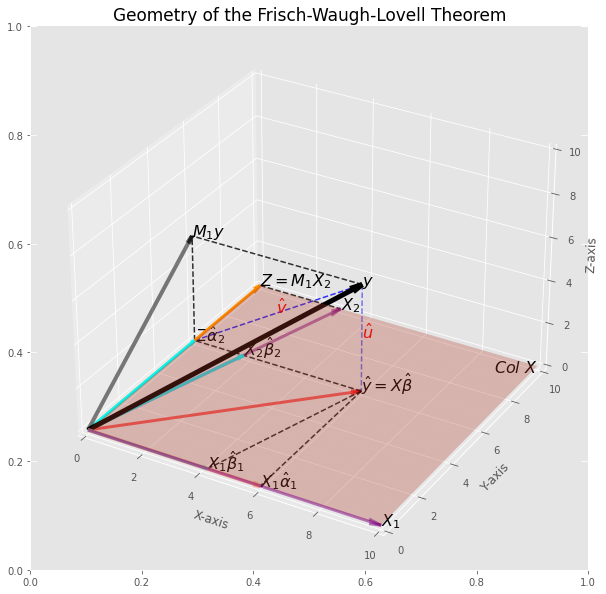

In [51]:
s = np.linspace(0, 10, 10)
t = np.linspace(0, 10, 10)
S, T = np.meshgrid(s, t)
X = S
Y = T
Z = np.zeros((10, 10))

fig, ax = plt.subplots(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha = .3)

y = np.array([6, 6, 5])
y_vec = np.array([[0, 0, 0, y[0], y[1], y[2]]])
X, Y, Z, U, V, W = zip(*y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 5)


yhat = np.array([y[0], y[1], 0])
yhat_vec = np.array([[0, 0, 0, yhat[0], yhat[1], yhat[2]]])
X, Y, Z, U, V, W = zip(*yhat_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

# yhat_vec = np.array([[0, 0, 0, 0, 0, y[2]]])
# X, Y, Z, U, V, W = zip(*yhat_vec)
# ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = .6,arrow_length_ratio = .04, pivot = 'tail',
#           linestyles = 'solid',linewidths = 3)



################################ regressors ########################################

X1 = np.array([10, 0, 0])
X2 = np.array([3, 10, 0])
X1_vec = np.array([[0, 0, 0, X1[0], X1[1], X1[2]]])
X, Y, Z, U, V, W = zip(*X1_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .5,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

X2 = np.array([3, 10, 0])
X2_vec = np.array([[0, 0, 0, X2[0], X2[1], X2[2]]])
X, Y, Z, U, V, W = zip(*X2_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'purple', alpha = .5,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

################################ OLS estimation ########################################
X1 = np.array([10, 0, 0])
X2 = np.array([3, 10, 0])
X = np.vstack((X1, X2)).T
beta_hat = np.linalg.inv(X.T@X)@X.T@y

################################ OLS linear combination ########################################

X1Beta1hat = beta_hat[0]*X1
X1Beta1hat_vec = np.array([[0, 0, 0, X1Beta1hat[0], X1Beta1hat[1], X1Beta1hat[2]]])
X, Y, Z, U, V, W = zip(*X1Beta1hat_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'aqua', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


X2Beta1hat = beta_hat[1]*X2
X2Beta1hat_vec = np.array([[0, 0, 0, X2Beta1hat[0], X2Beta1hat[1], X2Beta1hat[2]]])
X, Y, Z, U, V, W = zip(*X2Beta1hat_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'aqua', alpha = .8,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

##################################Orthogonalizing X2 ##################################
Z_orth = np.array([0, 10, 0])
Z_orth_vec = np.array([[0, 0, 0, Z_orth[0], Z_orth[1], Z_orth[2]]])
X, Y, Z, U, V, W = zip(*Z_orth_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'Darkorange', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

######################################Projecting y onto Z##########################################

projZorth_y = (np.dot(y, Z_orth)/(np.dot(Z_orth, Z_orth)))*Z_orth
projZorth_y_vec = np.array([[0, 0, 0, projZorth_y[0], projZorth_y[1], projZorth_y[2]]])
X, Y, Z, U, V, W = zip(*projZorth_y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'aqua', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

######################################Projecting y onto X1 ##########################################

projX1_y = (np.dot(y, X1)/(np.dot(X1, X1)))*X1
projX1_y_vec = np.array([[0, 0, 0, projX1_y[0], projX1_y[1], projX1_y[2]]])
X, Y, Z, U, V, W = zip(*projX1_y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'LightSalmon', alpha = .7,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 4)


###################################### M1y ##########################################
M1y=y-projX1_y
M1y_vec = np.array([[0, 0, 0, M1y[0], M1y[1], M1y[2]]])
X, Y, Z, U, V, W = zip(*M1y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'black', alpha = .5,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 4)
##################################### Dashed Lines #############################################

point1 = [y[0], y[1], y[2]]
point2 = [yhat[0], yhat[1], yhat[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.5, ls = '--')

## Z_orth to X ##
point1 = [Z_orth[0], Z_orth[1], Z_orth[2]]
point2 = [X2[0], X2[1], X2[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'k', lw = 1.5,alpha =0.8, ls = '--')

## Z_alpha2 to yhat ##
point1 = [yhat[0], yhat[1], yhat[2]]
point2 = [projZorth_y[0], projZorth_y[1], projZorth_y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'k', lw = 1.5,alpha =0.8, ls = '--')

## X1beta1 to yhat ##
point1 = [yhat[0], yhat[1], yhat[2]]
point2 = [X1Beta1hat[0], X1Beta1hat[1], X1Beta1hat[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'k', lw = 1.5,alpha =0.8, ls = '--')

## X1alpha1 to yhat ##
point1 = [yhat[0], yhat[1], yhat[2]]
point2 = [projX1_y[0], projX1_y[1], projX1_y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'k', lw = 1.5,alpha =0.8, ls = '--')

## M1y to y ##
point1 = [y[0], y[1], y[2]]
point2 = [M1y[0], M1y[1], M1y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'k', lw = 1.5,alpha =0.8, ls = '--')

## M1y to Zalpha2 ##
point1 = [projZorth_y[0], projZorth_y[1], projZorth_y[2]]
point2 = [M1y[0], M1y[1], M1y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'k', lw = 1.5,alpha =0.8, ls = '--')

## y to Zalpha2 ##
point1 = [projZorth_y[0], projZorth_y[1], projZorth_y[2]]
point2 = [y[0], y[1], y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

###########################################################################

ax.text(x = y[0], y = y[1], z = y[2], s = '$y$', size = 16)
ax.text(9, 9, 0, '$Col\ X$', size = 16)
ax.text(x = y[0], y = y[1], z = 0, s = r'$\hat{y}=X\hat{\beta}$', size = 16)
ax.text(x = X1[0], y = X1[1], z = X1[2], s = r'$X_1$', size = 16)
ax.text(x = X2[0], y = X2[1], z = X2[2], s = r'$X_2$', size = 16)
ax.text(x = X1Beta1hat[0], y = X1Beta1hat[1], z = X1Beta1hat[2], s = r'$X_1\hat{\beta}_1$', size = 16)
ax.text(x = X2Beta1hat[0], y = X2Beta1hat[1], z = X2Beta1hat[2], s = r'$X_2\hat{\beta}_2$', size = 16)
ax.text(x = Z_orth[0], y = Z_orth[1], z = Z_orth[2], s = r'$Z=M_1X_2$', size = 16)
ax.text(x = projZorth_y[0], y = projZorth_y[1], z = projZorth_y[2], s = r'$Z\hat{\alpha}_2$', size = 16)
ax.text(x = projX1_y[0], y = projX1_y[1], z = projX1_y[2], s = r'$X_1\hat{\alpha}_1$', size = 16)
ax.text(x = M1y[0], y = M1y[1], z = M1y[2], s = r'$M_1y$', size = 16)
ax.text(x = (y[0]+yhat[0])/2, y = (y[1]+yhat[1])/2, z = (y[2]+yhat[2])/2, s = r'$\hat{u}$', size = 16, color = 'r')
ax.text(x = (y[0]+projZorth_y[0])/2, y = (y[1]+projZorth_y[1])/2, z = (y[2]+projZorth_y[2])/2, s = r'$\hat{v}$', size = 16, color = 'r')


for i in ['x', 'y', 'z']:
    exec('ax.set_'+i+'lim3d(0, 10)')
    
ax.set_title('Geometry of the Frisch-Waugh-Lovell Theorem', fontsize = 17)
ax.set_xlabel('X-axis'),ax.set_ylabel('Y-axis'),ax.set_zlabel('Z-axis')
plt.show()

Verbally, $\text{FWL}$ theorems are 

1. The OLS estimates of $\beta_2$ from 
\begin{align}
\boldsymbol{y} &= \boldsymbol{X}_1\alpha_1+\boldsymbol{M}_1\boldsymbol{X}_2\beta_2 + \boldsymbol{u}\\
\boldsymbol{y} &= \boldsymbol{M}_1\boldsymbol{X}_2\beta_2 +\boldsymbol{v} 
\end{align}
are numerically identical.
2. The residuals from models
\begin{align}
\boldsymbol{M}_1\boldsymbol{y}&=\boldsymbol{M}_1\boldsymbol{X}_2\beta_2+\boldsymbol{u}\\
\boldsymbol{y}&=  \boldsymbol{X}_1\beta_1 + \boldsymbol{X}_2\beta_2 +\boldsymbol{u}
\end{align}
are numerically identical.

# <font face="gotham" color="purple"> Goodness of Fit, $\mathbf{R}^2$ </font>

The coefficient of determination $R^2$ is defined as

$$
R^2 = \frac{ESS}{TSS} = \frac{\|\boldsymbol{P_X}\boldsymbol{y}\|^2}{\|\boldsymbol{y}\|^2}=\cos^2{\vartheta}
$$

where angle $\vartheta$ is between the vector $\|\boldsymbol{y}\|$ and $\|\boldsymbol{P_Xy}\|$. Reproduce a OLS simulation

In [62]:
const = np.ones(100)
const = const[np.newaxis, :]
X_inde = np.random.randn(3, 100)
X = np.concatenate((const.T, X_inde.T), axis=1)

beta_array = np.array([2, 3, 4, 5])
beta_array = beta_array[np.newaxis, :].T

In [63]:
u = np.random.randn(100)
u = u[np.newaxis, :].T
y = X@beta_array + u

In [64]:
beta_hat = np.linalg.inv(X.T@X)@X.T@y

TSS = np.linalg.norm(y)
ESS = np.linalg.norm(X@beta_hat)
RSS = np.linalg.norm(y-X@beta_hat)
print('TSS : {:.4f}'.format(TSS**2))
print('ESS : {:.4f}'.format(ESS**2))
print('RSS : {:.4f}'.format(RSS**2))
print('ESS + RSS : {:.4f}'.format(ESS**2+RSS**2))

TSS : 6902.6086
ESS : 6799.0646
RSS : 103.5440
ESS + RSS : 6902.6086


In [68]:
print('R-sqr : {:.4f}'.format(ESS/TSS))

R-sqr : 0.9925


Compare with ```statsmodels``` result, the discrepancy is due to ```statsmodels``` using centered $\text{TSS}$.

In [71]:
ols_obj = sm.OLS(y, X)
ols_obj_fit = ols_obj.fit()
ols_obj_fit.rsquared

0.9821458610380575

Here's a $\text{2D}$ graphic demonstration. The larger of angle, the less of $\text{ESS}$, i.e. ${R}^2$ is smaller. 

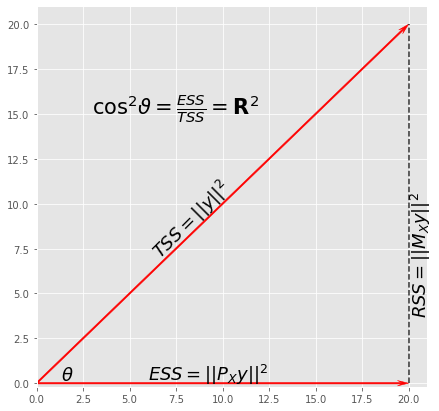

In [72]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.arrow(0, 0, 20, 0, color = 'red', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)
ax.arrow(0, 0, 20, 20, color = 'red', width = .08, 
         length_includes_head = True,
         head_width = .3, # default: 3*width
         head_length = .6,
         overhang = .4)

point1 = [20, 0]
point2 = [20, 20]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], c = 'k', lw = 1.5,alpha =0.8, ls = '--')

ax.text(1.3, .2, r'$\theta$', size = 18)
ax.text(6, 7, '$TSS=\|\|y\|\|^2$', size = 18, rotation = 45)
ax.text(6, .2, r'$ESS=\|\|P_Xy\|\|^2$', size = 18)
ax.text(20, 4, r'$RSS=\|\|M_Xy\|\|^2$', size = 18, rotation = 90)

ax.text(3,15,r'$\cos^2{\vartheta}= \frac{ESS}{TSS}=\mathbf{R}^2$', size = 21)
ax.axis([0, 21, -.2, 21])
plt.show()

The equality holds as long as $\text{ESS}$ and $\text{RSS}$ forms a right angle, hence any other estimation methods i.e. a non-OLS $\tilde{\beta}$'s $R^2$ no longer has this pure geometric interpretation.

The $R^2 = \frac{ESS}{TSS}$ is **uncentered $R^2$** since we are using uncertered $\text{TSS}$, sometimes it is denoted as $R^2_u$, because $R^2_u$ is not _invariant_ to change of $\vartheta$.

To see this, suppose the data matrix $\boldsymbol{X} = [\boldsymbol{\iota}\quad \boldsymbol{x}]$, where $\boldsymbol{\iota}$ is the constant term, if we add $\alpha \boldsymbol{\iota}$ onto $\boldsymbol{y}$ then decompose $\boldsymbol{y}+\alpha \boldsymbol{\iota}$ 

$$
\boldsymbol{y}+\alpha \boldsymbol{\iota} = \boldsymbol{P_X}(\boldsymbol{y}+\alpha \boldsymbol{\iota})+\boldsymbol{M_X}(\boldsymbol{y}+\alpha \boldsymbol{\iota})= \boldsymbol{P_X}\boldsymbol{y}+\alpha \boldsymbol{\iota}+\boldsymbol{M_X}\boldsymbol{y}
$$

The $R^2_u$ is 

$$
R^2_u = \frac{\|\boldsymbol{P_X}\boldsymbol{y}+\alpha \boldsymbol{\iota}\|^2}{\|\boldsymbol{y}+\alpha \boldsymbol{\iota}\|^2}
$$

Note that if $\alpha\rightarrow \infty$ , $R^2_u$ converges to $1$.

However, if we project $\boldsymbol{y}$ off $\iota$, this won't be the case anymore, because $\alpha$ doesn't exist in this case.

$$
R^2_c = \frac{\|\boldsymbol{P_X}\boldsymbol{M_\iota}\boldsymbol{y}\|^2}{\|\boldsymbol{M_\iota}\boldsymbol{y}\|^2}
$$
where $R^2_c$ means **centered** $R^2$.

## <font face="gotham" color="purple"> Visualizing $\mathbf{R}^2_u$ and $\mathbf{R}^2_c$ </font>

Suppose $\iota = (1,1,1)^T$, $\boldsymbol{x} = (1,2,5)^T$ and $\boldsymbol{y} = (2,1,10)^T$. We want to show that by adding $\alpha\boldsymbol{\iota}$ onto $\boldsymbol{y}$, the angle for calculating $R_u^2$ will change, in this case it becomes smaller, i.e. $R^2_u$ increases.

In [ ]:
x = np.array([1, 2, 5])
y = np.array([2, 1, 10])
iota = np.array([1, 1, 1])

s = np.linspace(-5, 10, 10)
t = np.linspace(-5, 10, 10)
S, T = np.meshgrid(s, t)
X = S + x[0]*T
Y = S + x[1]*T
Z = S + x[2]*T

fig, ax = plt.subplots(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha = .3)


y_vec = np.array([[0, 0, 0, y[0], y[1], y[2]]])
X, Y, Z, U, V, W = zip(*y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

x_vec = np.array([[0, 0, 0, x[0], x[1], x[2]]])
X, Y, Z, U, V, W = zip(*x_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)


iota_vec = np.array([[0, 0, 0, iota[0], iota[1], iota[2]]])
X, Y, Z, U, V, W = zip(*iota_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

X = np.vstack((iota, x)).T
Px_y = X@np.linalg.inv(X.T@X)@X.T@y
Px_y_vec = np.array([[0, 0, 0, Px_y[0], Px_y[1], Px_y[2]]])
X, Y, Z, U, V, W = zip(*Px_y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'aqua', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)
##################################################################

alpha = 5
alpha_iota = np.array([alpha, alpha, alpha])
alpha_iota_vec = np.array([[0, 0, 0, alpha_iota[0], alpha_iota[1], alpha_iota[2]]])
X, Y, Z, U, V, W = zip(*alpha_iota_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .5,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

yhat_plus_ai = Px_y + alpha_iota
yhat_plus_ai_vec = np.array([[0, 0, 0, yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2]]])
X, Y, Z, U, V, W = zip(*yhat_plus_ai_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'Darkorange', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

y_plus_ai = y + alpha_iota
y_plus_ai_vec = np.array([[0, 0, 0, y_plus_ai[0], y_plus_ai[1], y_plus_ai[2]]])
X, Y, Z, U, V, W = zip(*y_plus_ai_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'Green', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

##################################################################
## y to yhat ##
point1 = [Px_y[0], Px_y[1], Px_y[2]]
point2 = [y[0], y[1], y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## yhat+(alpha*iota) to yhat ##
point1 = [yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2]]
point2 = [Px_y[0], Px_y[1], Px_y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## yhat+(alpha*iota) to alpha*iota ##
point1 = [yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2]]
point2 = [alpha_iota[0], alpha_iota[1], alpha_iota[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## y to y+(alpha*iota) ##
point1 = [y[0], y[1], y[2]]
point2 = [y_plus_ai[0], y_plus_ai[1], y_plus_ai[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## alpha*iota to y+(alpha*iota) ##
point1 = [alpha_iota[0], alpha_iota[1], alpha_iota[2]]
point2 = [y_plus_ai[0], y_plus_ai[1], y_plus_ai[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

#####################################################################
ax.text(alpha_iota[0], alpha_iota[1],alpha_iota[2], r'$\alpha \iota$', size = 18)
ax.text(iota[0], iota[1],iota[2], r'$\iota$', size = 18)
ax.text(x[0], x[1],x[2], r'$x$', size = 18)
ax.text(y[0], y[1],y[2], r'$y$', size = 18)
ax.text(Px_y[0], Px_y[1], Px_y[2], r'$\hat{y}$', size = 18)
ax.text(yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2], r'$\hat{y}+\alpha \iota$', size = 18)
ax.text(y_plus_ai[0], y_plus_ai[1], y_plus_ai[2], r'$y+\alpha \iota$', size = 18)

for i in ['x', 'y', 'z']:
    exec('ax.set_'+i+'lim3d(0, 15)')
    
ax.set_title(r'Geometric Mechanism of $\mathbf{R}^2_u$ and $\mathbf{R}^2_c$', fontsize = 17)
ax.set_xlabel('X-axis'),ax.set_ylabel('Y-axis'),ax.set_zlabel('Z-axis')

ax.view_init(0, -35)

We can see from the graph above, the initial angle for $R^2_u$ is formed by vector $\boldsymbol{y}$ and $\boldsymbol{\hat{y}}$, after adding $\alpha\boldsymbol{\iota}$, the angle is formed by $\boldsymbol{y}+\alpha\boldsymbol{\iota}$ and $\boldsymbol{\hat{y}}+\alpha\boldsymbol{\iota}$. Let's evaluate the $\cos^2 {\vartheta}$ with numerical values in the graph.

Recall that we have a formula

$$
\mathbf{u}\cdot \mathbf{v} =\|\mathbf{u}\|\|\mathbf{v}\|\cos{\vartheta}
$$

In [ ]:
cos_theta = np.inner(y, Px_y)/(np.linalg.norm(y)*np.linalg.norm(Px_y))
print('The coefficient of determinant before addition is {0:.3f}.'.format(cos_theta**2))

In [ ]:
cos_theta = np.inner(y_plus_ai, yhat_plus_ai)/(np.linalg.norm(y_plus_ai)*np.linalg.norm(yhat_plus_ai))
print('The coefficient of determinant after addition is {0:.3f}.'.format(cos_theta**2))

The $R^2_u$ before and after the addition shows that adding constants onto $\boldsymbol{y}$ can change the value of $\cos^2{\vartheta}$.

Therefore, take precautions since you know that $R^2_u$ is not reliable in certain circumstances.

But now we need to show how to solve this problem by using $R_c^2$.

In [ ]:
x = np.array([1, 2, 5])
y = np.array([2, 1, 10])
iota = np.array([1, 1, 1])

s = np.linspace(-8, 10, 10)
t = np.linspace(-8, 10, 10)
S, T = np.meshgrid(s, t)
X = S + x[0]*T
Y = S + x[1]*T
Z = S + x[2]*T

fig, ax = plt.subplots(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, alpha = .3)


y_vec = np.array([[0, 0, 0, y[0], y[1], y[2]]])
X, Y, Z, U, V, W = zip(*y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'red', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

X = np.vstack((iota, x)).T
Px_y = X@np.linalg.inv(X.T@X)@X.T@y
Px_y_vec = np.array([[0, 0, 0, Px_y[0], Px_y[1], Px_y[2]]])
X, Y, Z, U, V, W = zip(*Px_y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'aqua', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)
##################################################################

alpha = 5
alpha_iota = np.array([alpha, alpha, alpha])
alpha_iota_vec = np.array([[0, 0, 0, alpha_iota[0], alpha_iota[1], alpha_iota[2]]])
X, Y, Z, U, V, W = zip(*alpha_iota_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'blue', alpha = .5,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

yhat_plus_ai = Px_y + alpha_iota
yhat_plus_ai_vec = np.array([[0, 0, 0, yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2]]])
X, Y, Z, U, V, W = zip(*yhat_plus_ai_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'Darkorange', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

y_plus_ai = y + alpha_iota
y_plus_ai_vec = np.array([[0, 0, 0, y_plus_ai[0], y_plus_ai[1], y_plus_ai[2]]])
X, Y, Z, U, V, W = zip(*y_plus_ai_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'Green', alpha = 1,arrow_length_ratio = .04, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

iota = iota[:,np.newaxis]
M_iota_y = (np.eye(3,3) - iota@np.linalg.inv(iota.T@iota)@iota.T)@y
M_iota_y_vec = np.array([[0, 0, 0, M_iota_y[0], M_iota_y[1], M_iota_y[2]]])
X, Y, Z, U, V, W = zip(*M_iota_y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'SteelBlue', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)

x = np.array([1, 2, 5])
iota = np.array([1, 1, 1])
X = np.vstack((iota, x)).T
Px_M_iota_y = X@np.linalg.inv(X.T@X)@X.T@M_iota_y
Px_M_iota_y_vec = np.array([[0, 0, 0, Px_M_iota_y[0], Px_M_iota_y[1], Px_M_iota_y[2]]])
X, Y, Z, U, V, W = zip(*Px_M_iota_y_vec)
ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = 'Teal', alpha = 1,arrow_length_ratio = .08, pivot = 'tail',
          linestyles = 'solid',linewidths = 3)
##################################################################
## y to yhat ##
point1 = [Px_y[0], Px_y[1], Px_y[2]]
point2 = [y[0], y[1], y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## yhat+(alpha*iota) to yhat ##
point1 = [yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2]]
point2 = [Px_y[0], Px_y[1], Px_y[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## yhat+(alpha*iota) to alpha*iota ##
point1 = [yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2]]
point2 = [alpha_iota[0], alpha_iota[1], alpha_iota[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## y to y+(alpha*iota) ##
point1 = [y[0], y[1], y[2]]
point2 = [y_plus_ai[0], y_plus_ai[1], y_plus_ai[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

## alpha*iota to y+(alpha*iota) ##
point1 = [alpha_iota[0], alpha_iota[1], alpha_iota[2]]
point2 = [y_plus_ai[0], y_plus_ai[1], y_plus_ai[2]]
line1 = np.array([point1, point2])
ax.plot(line1[:,0], line1[:,1], line1[:, 2], c = 'b', lw = 1.5,alpha =0.8, ls = '--')

#####################################################################
ax.text(alpha_iota[0], alpha_iota[1],alpha_iota[2], r'$\alpha \iota$', size = 18)
ax.text(y[0], y[1],y[2], r'$y$', size = 18)
ax.text(Px_y[0], Px_y[1], Px_y[2], r'$\hat{y}$', size = 18)
ax.text(yhat_plus_ai[0], yhat_plus_ai[1], yhat_plus_ai[2], r'$\hat{y}+\alpha \iota$', size = 18)
ax.text(y_plus_ai[0], y_plus_ai[1], y_plus_ai[2], r'$y+\alpha \iota$', size = 18)
ax.text(M_iota_y[0], M_iota_y[1], M_iota_y[2], r'$M_\iota y$', size = 18)
ax.text(Px_M_iota_y[0], Px_M_iota_y[1], Px_M_iota_y[2], r'$P_X M_\iota y$', size = 18)

for i in ['x', 'y', 'z']:
    exec('ax.set_'+i+'lim3d(0, 15)')
    
ax.set_title(r'Geometric Mechanism of $\mathbf{R}^2_u$ and $\mathbf{R}^2_c$', fontsize = 17)
ax.set_xlabel('X-axis'),ax.set_ylabel('Y-axis'),ax.set_zlabel('Z-axis')

ax.view_init(-64, -48)

Once we have project $\boldsymbol{y}$ off $\boldsymbol{\iota}$, the angle $\vartheta$ will be preserved, no matter what contants being added onto $\boldsymbol{y}$, we can also show this algebreically

$$
R^2_c = \frac{\|\boldsymbol{P_X}\boldsymbol{M_\iota}(\boldsymbol{y}+\alpha\iota)\|^2}{\|\boldsymbol{M_\iota}(\boldsymbol{y}+\alpha\iota)\|^2}= \frac{\|\boldsymbol{P_X}\boldsymbol{M_\iota}\boldsymbol{y}\|^2}{\|\boldsymbol{M_\iota}\boldsymbol{y}\|^2}
$$

Nevertheless, the $R^2_c$ does not make sense when there is no constant term. 

Again, when the estimates are other than OLS, say $\tilde{\beta}$, Pythagoras' Theorem will not hold, sometimes $R^2$ might be even higher than $1$ or lower than $0$.

In [ ]:
x = np.array([1, 2, 5])
y = np.array([2, 1, 10])
iota = np.array([1, 1, 1])
e2 = np.array([0, 1, 0])
X = np.vstack((iota, x, e2)).T

In [ ]:
np.linalg.inv(X.T@X)@X.T@y

## <font face="gotham" color="purple"> Adjusted $\mathbf{R}^2$ </font>

In general, $R^2$ is a misleading indicator, it is easy to lose the insight of it. And one problem the beginners facing constantly is that adding explanatory variables can reward you by gaining higher $R_u^2$ or $R_c^2$.

It is easy to imagine the geometry why this is the case. Adding one variable means the $\text{Span}(X)$ is also adding one dimension, the new $\text{Span}(X^+)$ will be orthogonally closer to $\boldsymbol{y}$, i.e. larger $ESS$ and smaller $RSS$. To neutralize this phenomenon, we invented $\bar{R}^2$, the adjusted $R^2$.

In OLS, $\bar{R}^2$ can be negative, which signals a very poor fit.

The formula of $\bar{R}^{2}$ is

$$\bar{R}^{2} \equiv 1-\frac{\frac{1}{n-k} \sum_{t=1}^{n} \hat{u}_{t}^{2}}{\frac{1}{n-1} \sum_{t=1}^{n}\left(y_{t}-\bar{y}\right)^{2}}=1-\frac{(n-1) \boldsymbol{y}^{\top} \boldsymbol{M}_{\boldsymbol{X}} \boldsymbol{y}}{(n-k) \boldsymbol{y}^{\top} \boldsymbol{M}_{\iota} \boldsymbol{y}}$$

The numerator and denominator of $R_c^2$ were replaced by its unbiased estimator, there is no need to derive it, accept it as a fact.

# <font face="gotham" color="purple"> The Diagonal of $\boldsymbol{P_X}$ </font>

We denote the $t^{th}$ diagonal element of $\boldsymbol{P_X}$ as $h_t$. 

$$
h_t = \boldsymbol{e}_t^T\boldsymbol{P_X}\boldsymbol{e}_t =(\boldsymbol{P_X}\boldsymbol{e}_1)^T(\boldsymbol{P_X}\boldsymbol{e}_1)= \|\boldsymbol{P_X}\boldsymbol{e}_t\|^2
$$

where $\boldsymbol{e}_t$ means the $t^{th}$ element is $1$ and rest are $0$'s.

From last equation, we can tell that $0 \leq h_t$, also because $\|\boldsymbol{P_X}\boldsymbol{e}_t\|<\|\boldsymbol{e}_t\|$ and  $\|\boldsymbol{e}_t\|=1$.So we pin down the range of $h_t$:

$$0 \leq h_t < 1$$